# AIMS

## Supervised Learning


The y column is offer_type. It will help to predict the correct offer_type to send to each customer.

Metrics:

Since we have few binomial outcomes (BOGO = 1, discount = 2, informational = 3), we can use Classification models.

Since it is a classification problem, we will use accuracy and presicion score to evaluate my models.

Comapre the correct predictions and total number of predicitons to determine the accuracy of the model and choose the best.

Five different ML algorithms can be test on the datset :

- Decision Trees
- Logistic Regression
- Nearest Neighbours (KNN)
- Naive Bayes
- Random Forest

Notes:
- Initializing random_state to arbitrary number 42 because the seed will be set common for LogisticRegression and RandomForestClassifier models.
- For RandomForestClassifier, initializing 500 to n_estimators parameter (The number of trees in the forest) for better accuracy.
- Default parameter settings were used for KNeighborsClassifier(), GaussianNB() and DecisionTreeClassifier() in this dataset.


In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import pandas as pd
import numpy as np
import json

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import fbeta_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

In [5]:
# Crear los de drive
G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones('starbucks')

In [14]:
# csv y jsons 
offer_df = pd.read_csv(path.data_processed_dir('offer_df.csv'))
offer_df.head()

,offer_completed,offer_recived,offer_viewed,event,time,offer_id,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
0,0,1,0,offer received,0,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
1,0,0,1,offer viewed,6,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
2,1,0,0,offer completed,132,6,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,1
3,0,1,0,offer received,168,5,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1
4,0,0,1,offer viewed,216,5,0,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,0.0,3.0,2,1.0,0.0,1.0,1.0,1


In [15]:
offer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   offer_completed        148805 non-null  int64  
 1   offer_recived          148805 non-null  int64  
 2   offer_viewed           148805 non-null  int64  
 3   event                  148805 non-null  object 
 4   time                   148805 non-null  int64  
 5   offer_id               148805 non-null  int64  
 6   gender                 148805 non-null  int64  
 7   age                    148805 non-null  int64  
 8   became_member_on       148805 non-null  object 
 9   income                 148805 non-null  int64  
 10  age_groups             148805 non-null  int64  
 11  salary_groups          148805 non-null  int64  
 12  member_year            148805 non-null  int64  
 13  member_month           148805 non-null  int64  
 14  member_day             148805 non-nu

In [16]:
offer_df.columns

Index(['offer_completed', 'offer_recived', 'offer_viewed', 'event', 'time',
       'offer_id', 'gender', 'age', 'became_member_on', 'income', 'age_groups',
       'salary_groups', 'member_year', 'member_month', 'member_day',
       'members_since_in_days', 'member_since_year', 'reward_y', 'difficulty',
       'duration', 'offer_type', 'email', 'web', 'mobile', 'social',
       'customer_ids'],
      dtype='object')

In [18]:
# Split data:

y = offer_df['offer_type']
X = offer_df.loc[:,['offer_completed', 'offer_recived', 'offer_viewed', 'time', 'age', 'gender', 'income', 'member_year', 
                    'difficulty','duration', 'reward_y', 'email', 'web', 'mobile','social']]

In [19]:
X.head()

,offer_completed,offer_recived,offer_viewed,time,age,gender,income,member_year,difficulty,duration,reward_y,email,web,mobile,social
0,0,1,0,0,75,0,100000,2017,5.0,7.0,5.0,1.0,1.0,1.0,0.0
1,0,0,1,6,75,0,100000,2017,5.0,7.0,5.0,1.0,1.0,1.0,0.0
2,1,0,0,132,75,0,100000,2017,5.0,7.0,5.0,1.0,1.0,1.0,0.0
3,0,1,0,168,75,0,100000,2017,0.0,3.0,0.0,1.0,0.0,1.0,1.0
4,0,0,1,216,75,0,100000,2017,0.0,3.0,0.0,1.0,0.0,1.0,1.0


In [20]:
y.head()

0    0
1    0
2    0
3    2
4    2
Name: offer_type, dtype: int64

In [22]:
# Create training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)

In [24]:
print('X training data Shape:', X_train.shape)
print('y training data Shape:', y_train.shape)
print('X testing data Shape:', X_test.shape)
print('y testing data Shape:', y_test.shape)

X training data Shape: (119044, 15)
y training data Shape: (119044,)
X testing data Shape: (29761, 15)
y testing data Shape: (29761,)


In [26]:
# function for checking accuracy:
def predict_score(model, X_train, y_train, X_test, y_test):
    '''
    INPUT:
       - model: the learning algorithm to be trained and predicted
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
       
    OUTPUT:
        - Accuracy Scores and F Scores of the models
    '''
    
    results = {}
    
    # Fit the model to the training data:
    model.fit(X_train, y_train)
    
    # predict on the testing data:
    pred = model.predict(X_test)

    # Confusion matrix:
    confusion_matrix(pred, y_test)
    
    # Accuracy for testing data:
    results['accuracy'] = accuracy_score(pred, y_test)
    
    # F-score on testing data:
    results['f_score'] = fbeta_score(y_test, pred, beta = 0.5, average='weighted')
    
    results['precision'] = precision_score(y_test, pred, average='micro')
    
    results['recall'] = recall_score(y_test, pred, average='micro')  
    
    return results

In [34]:
# Initialize the models

log = LogisticRegression(random_state=420)
rfc = RandomForestClassifier(n_estimators = 100, random_state=420)
knc = KNeighborsClassifier()
gnb = GaussianNB() 
dtc = DecisionTreeClassifier()

In [35]:
# Collect results on the models:

results = {}
for model in [log, rfc, knc, gnb, dtc]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name] = predict_score(model, X_train, y_train, X_test, y_test)

In [36]:
# Display results:

for ele in results.items():
    print (ele[0])
    display(pd.DataFrame(ele[1], index=range(1)))

LogisticRegression


,accuracy,f_score,precision,recall
0,0.871678,0.872551,0.871678,0.871678


RandomForestClassifier


,accuracy,f_score,precision,recall
0,1.0,1.0,1.0,1.0


KNeighborsClassifier


,accuracy,f_score,precision,recall
0,0.819865,0.824048,0.819865,0.819865


GaussianNB


,accuracy,f_score,precision,recall
0,1.0,1.0,1.0,1.0


DecisionTreeClassifier


,accuracy,f_score,precision,recall
0,1.0,1.0,1.0,1.0


## Model Refinement:

Accuracy score, F1 score, recall score and precisioni score is 100% for testing datasets for RandomForestClassifier, LogisticRegression, GaussianNB, DecisionTreeClassifier which can lead to overfitting

So, we choose KNeighborsClassifier.

It has good results of 0.81 on testing datasets.
Since we have few multinomial outcomes ( BOGO = 1, discount = 2, informational = 3 ) we can use KNeighborsClassifier.
Accuracy and precision and recall scores are same for KNeighborsClassifier, with (0.81). 

I will choose KNeighborsClassifier model for further refinement with GridSearchCV.

Since accuracy and precision scores are in this model, will consider precision value as a optimal for this particular dataset for correct positive predictions.

## Hyper parameter tuning of KNeighborsClassifier to increase the accuracy

It is possible to improve the performance of the model from it base instance by tuning hyperparameters of that algorithm.

We will define a range of values that would be evaluated in the hyper parameter space of the for KNeighborsClassifier model using GridSearchCV.

{"n_neighbors" :list(range(20,30)), "p" : [1]} are the grid parameters that we are using in this data set.

Initializing random_state to arbitrary number 42 because the seed will be set common for this model.

Here we are using the RepeatedStratifiedKFold class. And RepeatedKFold with an appropriate number of folds and repeats, such as 10 folds and three repeats.

In [38]:
model = KNeighborsClassifier()

para_grid = {"n_neighbors" :list(range(20,30)), 
             "p" : [1]}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

grid_search = GridSearchCV(estimator = model, param_grid = para_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)
accuracy_score(y_pred, y_test)

0.8967104599979839

In [39]:
# Confusion matrix:

confusion_matrix(y_pred, y_test)

array([[11846,  1391,   472],
       [  905, 11147,   302],
       [    3,     1,  3694]], dtype=int64)

In [42]:
# find the best parameter values:

best_parameters = grid_result.best_params_
best_parameters

{'n_neighbors': 21, 'p': 1}

the final model parameters that we have selected for this data set are {'n_neighbors' = 21, 'p' = 1}

In [43]:
# instantiate model with best parameters:

predict_score(KNeighborsClassifier(n_neighbors = 21, p = 1), X_train, y_train, X_test, y_test)

{'accuracy': 0.8967104599979839,
 'f_score': 0.8985373951935525,
 'precision': 0.8967104599979839,
 'recall': 0.8967104599979839}

The best scores achieved after tuning, its essential hyper-parameters {'n_neighbors' = 21, 'p' = 1} by KNeighborsClassifier : testing accuracy is 0.89 (89%)

Testing accuracy has increased after hyperparameter tunning.

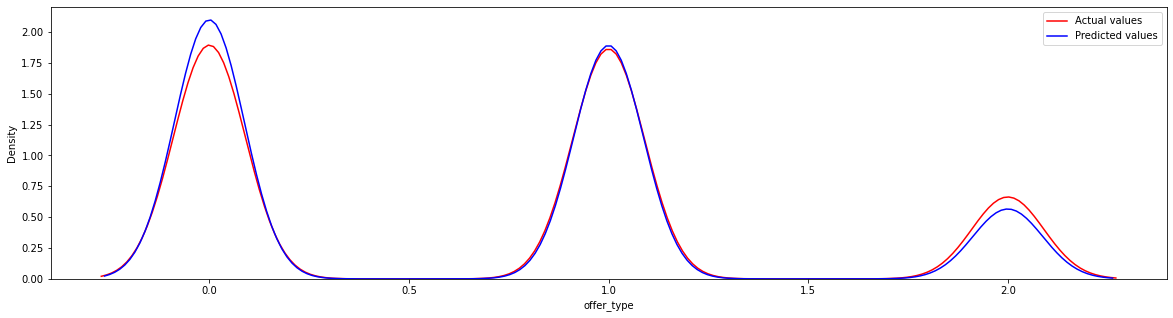

In [44]:
# Graph to display actual and predict values:

plt.figure(figsize=[20,5])
ax1 = sb.kdeplot(data=y_test, color="r", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

## Evalute the model accuracy:

In [45]:
X.columns

Index(['offer_completed', 'offer_recived', 'offer_viewed', 'time', 'age',
       'gender', 'income', 'member_year', 'difficulty', 'duration', 'reward_y',
       'email', 'web', 'mobile', 'social'],
      dtype='object')

In [46]:
X.iloc[2275,:]

offer_completed        0.0
offer_recived          1.0
offer_viewed           0.0
time                 576.0
age                   66.0
gender                 0.0
income             32000.0
member_year         2018.0
difficulty            10.0
duration               7.0
reward_y              10.0
email                  1.0
web                    0.0
mobile                 1.0
social                 1.0
Name: 2275, dtype: float64

In [47]:
y.iloc[2275]

0

## Now lets evaluate our model to check its accuracy:

In [49]:
customer_data = [0.0, 1.0, 0.0, 576.0, 66.0, 0.0, 32000.0, 2018.0, 10.0, 7.0, 10.0, 1.0, 0.0, 1.0, 1.0]

In [50]:
grid_result.predict([customer_data])

array([0], dtype=int64)

In [51]:
X.iloc[2,:]

offer_completed         1.0
offer_recived           0.0
offer_viewed            0.0
time                  132.0
age                    75.0
gender                  0.0
income             100000.0
member_year          2017.0
difficulty              5.0
duration                7.0
reward_y                5.0
email                   1.0
web                     1.0
mobile                  1.0
social                  0.0
Name: 2, dtype: float64

In [52]:
y.iloc[2275]

0

In [53]:
customer_data1 = [1.0, 0.0, 0.0, 132.0, 75.0, 0.0, 100000.0, 2017.0, 5.0, 7.0, 5.0, 1.0, 1.0, 1.0, 0.0]
grid_result.predict([customer_data1])

array([0], dtype=int64)

In [54]:
clf_1 = KNeighborsClassifier(n_neighbors = 21, p = 1)
clf_1.fit(X_train, y_train)

y_p = clf_1.predict(X_test)

print(classification_report(y_p, y_test))
accuracy_score(y_p, y_test)
precision_score(y_p, y_test, average='micro')

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     13709
           1       0.89      0.90      0.90     12354
           2       0.83      1.00      0.90      3698

    accuracy                           0.90     29761
   macro avg       0.88      0.92      0.90     29761
weighted avg       0.90      0.90      0.90     29761



0.8967104599979839

The model has correctly predicted that the customer will likely respond tor BOGO offer type with an accuracy of 89%.

Hence our model has good accuracy for prediction.

KNeighborsClassifier turned out to be the best algorithm for this task and predicts customer response with an accuracy rate of almost 89% after hyperarameter tuning. Given the fact that also the same customer will react differently the same offer.